In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, \
    classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
hours_study = np.array([1,2,3,4,5,6,7,8,9])
pass_exam = np.array([0,0,0,0,1,1,1,1,1])
df = pd.DataFrame({
    'hours_study':hours_study,
    'pass_exam':pass_exam
})
lr = LogisticRegression()
lr.fit(df[['hours_study']],df['pass_exam'])
lr.coef_,lr.intercept_

(array([[1.17808562]]), array([-5.29559243]))

In [3]:
x_test = pd.DataFrame({'hours_study':np.linspace(0,10,200)})
y_prob = lr.predict_proba(x_test)[:,1]


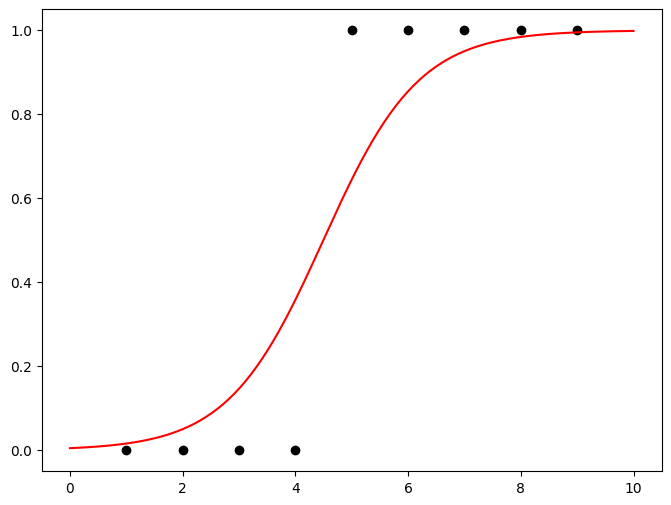

In [4]:
plt.figure(figsize=(8,6))
plt.scatter(df['hours_study'],df['pass_exam'],color = 'black')
plt.plot(x_test,y_prob,color = 'red')

#### LR in actual data

In [5]:
data = load_breast_cancer()
X = data.data
y = data.target
features = data.feature_names
df = pd.DataFrame(X,columns=features)
df['target'] = y
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42,stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [7]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled,y_train)
y_pred = lr.predict(X_test_scaled)
y_prob = lr.predict_proba(X_test_scaled)[:,1]
print('Accuracy',accuracy_score(y_test,y_pred))

Accuracy 0.9824561403508771


In [8]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[41,  1],
       [ 1, 71]])

<Axes: >

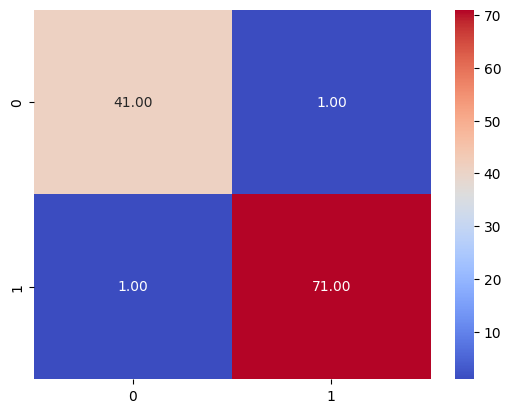

In [9]:
sns.heatmap(data=cm,cmap='coolwarm',fmt='.2f',annot=True)

In [10]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



##### Regularization

In [14]:
lr_strong = LogisticRegression(max_iter=100,C=.01)
lr_weak = LogisticRegression(max_iter=100,C=1000)
lr_strong.fit(X_train_scaled,y_train)
lr_weak.fit(X_train_scaled,y_train)
y_pred_strong = lr_strong.predict(X_test_scaled)
y_pred_weak = lr_weak.predict(X_test_scaled)
print('Strong accuracy',accuracy_score(y_test,y_pred_strong))
print('Weak accuracy',accuracy_score(y_test,y_pred_weak))

Strong accuracy 0.956140350877193
Weak accuracy 0.956140350877193
